### Step 1: Importing Required Libraries
In this step, we import the Python libraries needed for data loading, analysis, visualization, and model building.

- **pandas** and **numpy**: data handling and preprocessing  
- **matplotlib** & **seaborn**: visual exploration  
- **sklearn**: regression modeling and evaluation  

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# For better plot style
sns.set(style="whitegrid")

### Step 2: Load the Medical Cost Personal Dataset
We load the dataset using `pd.read_csv()` and display the first few rows to understand
its structure.

Make sure the CSV file is in your working directory.

In [3]:
# Load dataset (update path if needed)
data = pd.read_csv(r"C:\Users\Salman\Downloads\insurance.csv")

# Display first few rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Step 3: Dataset Information & Summary Statistics
We check:
- Column names and data types  
- Presence of missing values  
- Summary statistics for numerical features  

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Step 4: Check for Missing Values
This step ensures the dataset does not contain missing or null entries
that could affect the model's performance.

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
### Step 5: Exploratory Data Analysis (EDA)
We visualize how key features impact insurance charges:

- **Age vs Charges**
- **BMI vs Charges**
- **Smoking Status vs Charges**

These visualizations help us identify which factors strongly influence the claim amount.

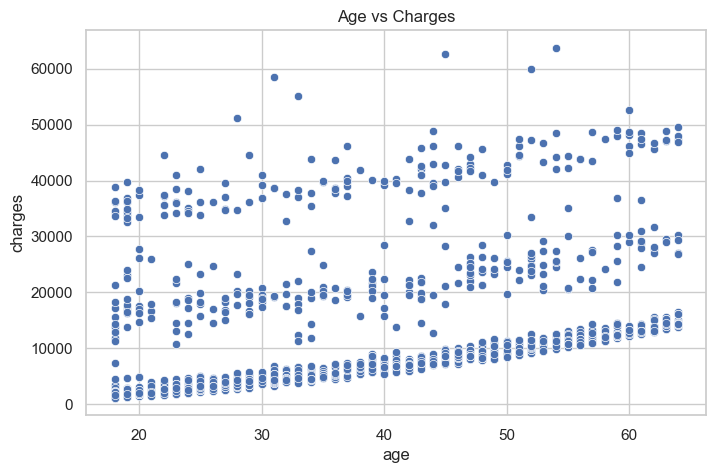

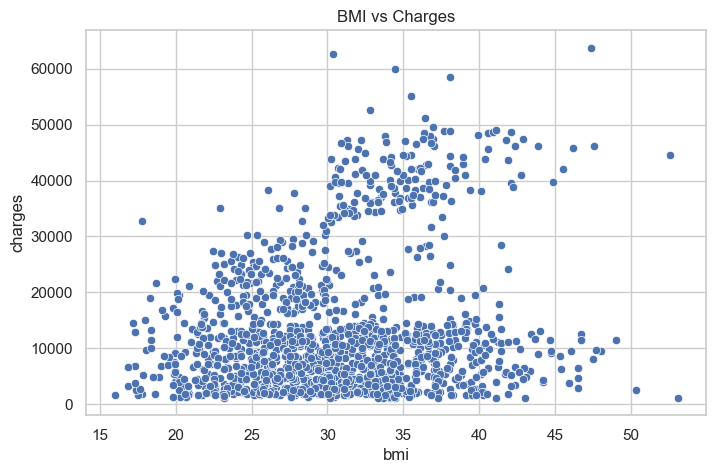

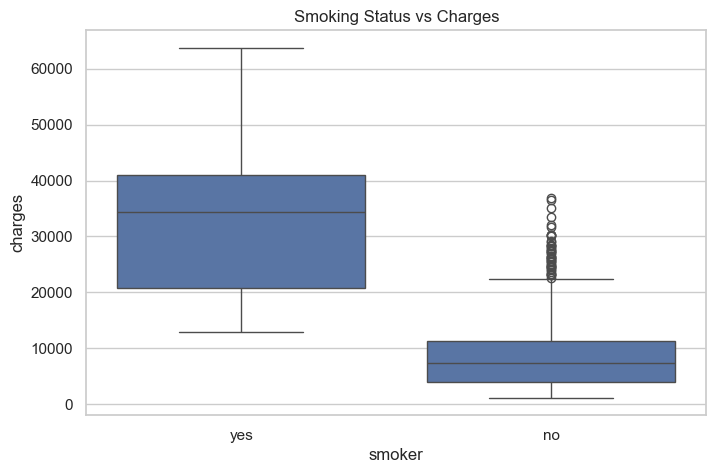

In [22]:
# Age vs Charges
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='age', y='charges')
plt.title("Age vs Charges")
plt.show()

# BMI vs Charges
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='bmi', y='charges')
plt.title("BMI vs Charges")
plt.show()

# Smoking vs Charges
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='smoker', y='charges')
plt.title("Smoking Status vs Charges")
plt.show()

### Step 6: Encode Categorical Features
We convert non-numeric fields into numeric format using one-hot encoding:
- **sex**
- **smoker**
- **region**

This allows the regression model to use these features.

In [23]:
# One-hot encode categorical features
df = pd.get_dummies(data, drop_first=True)

df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


### Step 8: Splitting Data into Training and Testing Sets
We split the dataset to evaluate model performance on unseen data.

- 80% → train
- 20% → test

In [24]:
# Features (X) are all columns except 'charges'
X = df.drop("charges", axis=1)

# Target (y) is the 'charges' column
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 9: Training the Linear Regression Model
We create and fit a `LinearRegression()` model using the training data.

In [25]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

### Step 10: Model Evaluation
We evaluate regression performance using:

- **MAE (Mean Absolute Error)**
- **MSE (Mean Squared Error)**
- **RMSE (Root Mean Squared Error)**

These metrics show how far predictions are from actual values.

In [26]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4181.194473753654
Mean Squared Error (MSE): 33596915.85136146
Root Mean Squared Error (RMSE): 5796.2846592762735


### Step 11: Correlation Heatmap
We plot a heatmap to see how strongly each feature correlates with the insurance charges.

This helps identify the most influential predictors.

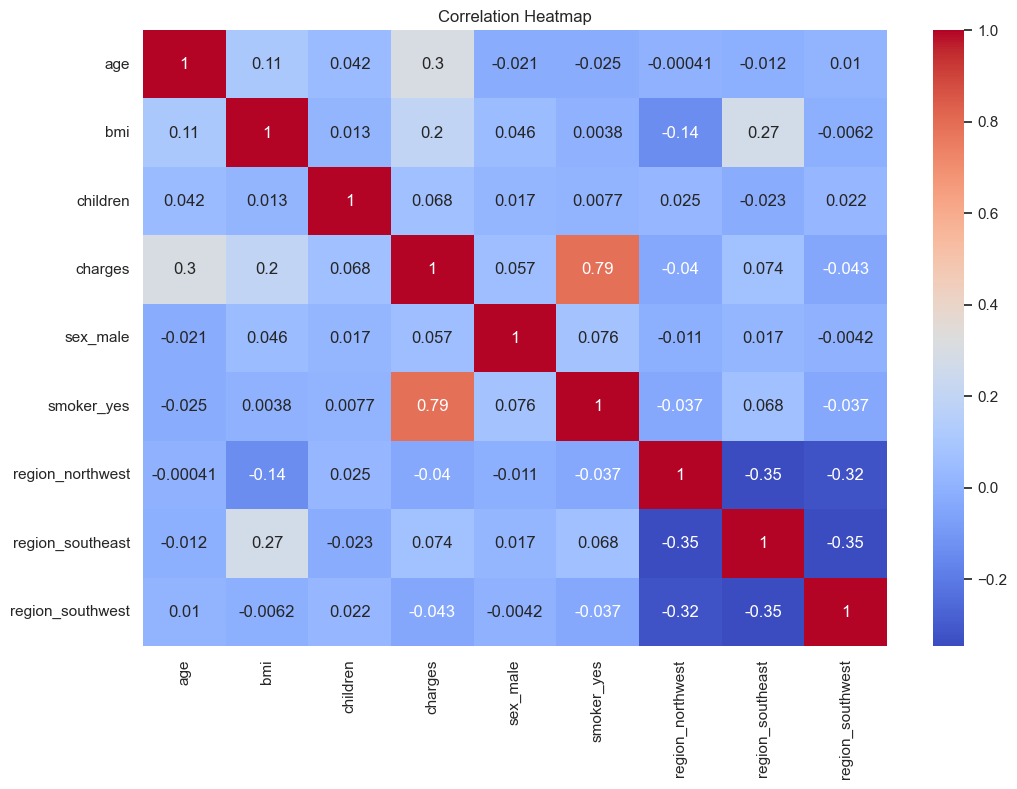

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Step 12: Final Insights from the Model and EDA

Based on analysis:

- **Smoking** is the strongest factor impacting insurance charges.  
- **BMI** has a strong positive relationship with charges (higher BMI = higher cost).  
- **Age** also increases medical cost significantly.  
- The Linear Regression model gives a reasonable approximation but could be improved using  
  Random Forest, XGBoost, or Polynomial Regression.

These insights help insurance companies estimate claim costs more accurately.